In [34]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import tree



from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
mushroom = pd.read_excel("/mushroomdata.xlsx")

In [36]:
mushroom.head()

,Class,Cap_shape,Cap_surface,Cap_color,Bruise_,Odor,Gill_attachment,Gill_spacing,Gill_size,Gill_color,Stalk_shape,Stalk_root,Stalksurface_ar,Stalksurface_br,Stalkcolor_ar,Stalkcolor_br,Veil_type,Veil_color,Ring_nbr,Ring_type,Spore_pcolor,Population,Habitat
0,Edible,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,Edible,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,Edible,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,Edible,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,Edible,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [37]:
labels= mushroom.filter(items=["Class"])
labels.head()

,Class
0,Edible
1,Edible
2,Edible
3,Edible
4,Edible


In [38]:
features= mushroom.filter(items= ["Cap_shape","Cap_surface","Cap_color","Bruise_","Odor","Gill_attachment","Gill_spacing","Gill_size","Gill_color","Stalk_shape","Stalk_root","Stalksurface_ar","Stalksurface_br","Stalkcolor_ar","Stalkcolor_br","Veil_type","Veil_color","Ring_nbr","Ring_type","Spore_pcolor","Population","Habitat"] )
features.head()

,Cap_shape,Cap_surface,Cap_color,Bruise_,Odor,Gill_attachment,Gill_spacing,Gill_size,Gill_color,Stalk_shape,Stalk_root,Stalksurface_ar,Stalksurface_br,Stalkcolor_ar,Stalkcolor_br,Veil_type,Veil_color,Ring_nbr,Ring_type,Spore_pcolor,Population,Habitat
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [39]:
features_oh=pd.get_dummies(features, columns= ["Cap_shape","Cap_surface","Cap_color","Bruise_","Odor","Gill_attachment","Gill_spacing","Gill_size","Gill_color","Stalk_shape","Stalk_root","Stalksurface_ar","Stalksurface_br","Stalkcolor_ar","Stalkcolor_br","Veil_type","Veil_color","Ring_nbr","Ring_type","Spore_pcolor","Population","Habitat"])

In [40]:
features_oh

,Cap_shape_BELL,Cap_shape_CONICAL,Cap_shape_CONVEX,Cap_shape_FLAT,Cap_shape_KNOBBED,Cap_shape_SUNKEN,Cap_surface_FIBROUS,Cap_surface_GROOVES,Cap_surface_SCALY,Cap_surface_SMOOTH,Cap_color_BROWN,Cap_color_BUFF,Cap_color_CINNAMON,Cap_color_GRAY,Cap_color_GREEN,Cap_color_PINK,Cap_color_PURPLE,Cap_color_RED,Cap_color_WHITE,Cap_color_YELLOW,Bruise__BRUISES,Bruise__NO,Odor_ALMOND,Odor_ANISE,Odor_CREOSOTE,Odor_FISHY,Odor_FOUL,Odor_MUSTY,Odor_NONE,Odor_PUNGENT,Odor_SPICY,Gill_attachment_ATTACHED,Gill_attachment_FREE,Gill_spacing_CLOSE,Gill_spacing_CROWDED,Gill_size_BROAD,Gill_size_NARROW,Gill_color_BLACK,Gill_color_BROWN,Gill_color_BUFF,...,Stalkcolor_br_ORANGE,Stalkcolor_br_PINK,Stalkcolor_br_RED,Stalkcolor_br_WHITE,Stalkcolor_br_YELLOW,Veil_type_PARTIAL,Veil_color_BROWN,Veil_color_ORANGE,Veil_color_WHITE,Veil_color_YELLOW,Ring_nbr_NONE,Ring_nbr_ONE,Ring_nbr_TWO,Ring_type_EVANESCENT,Ring_type_FLARING,Ring_type_LARGE,Ring_type_NONE,Ring_type_PENDANT,Spore_pcolor_BLACK,Spore_pcolor_BROWN,Spore_pcolor_BUFF,Spore_pcolor_CHOCOLATE,Spore_pcolor_GREEN,Spore_pcolor_ORANGE,Spore_pcolor_PURPLE,Spore_pcolor_WHITE,Spore_pcolor_YELLOW,Population_ABUNDANT,Population_CLUSTERED,Population_NUMEROUS,Population_SCATTERED,Population_SEVERAL,Population_SOLITARY,Habitat_GRASSES,Habitat_LEAVES,Habitat_MEADOWS,Habitat_PATHS,Habitat_URBAN,Habitat_WASTE,Habitat_WOODS
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8412,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8413,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8414,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8415,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

X_train, X_test, y_train, y_test = train_test_split(features_oh, labels, test_size=0.3, random_state=42)
d_tree1 = DecisionTreeClassifier(max_depth = 2, random_state=42)
d_tree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

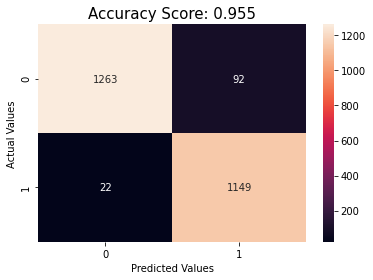

In [42]:
predictions = d_tree1.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.98      0.93      0.96      1355
   Poisonous       0.93      0.98      0.95      1171

    accuracy                           0.95      2526
   macro avg       0.95      0.96      0.95      2526
weighted avg       0.96      0.95      0.95      2526



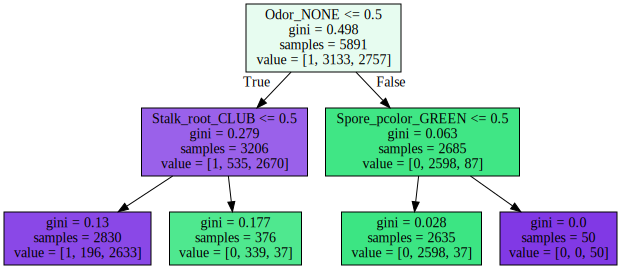

In [44]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(d_tree1, out_file=None,feature_names= features_oh.columns, 
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

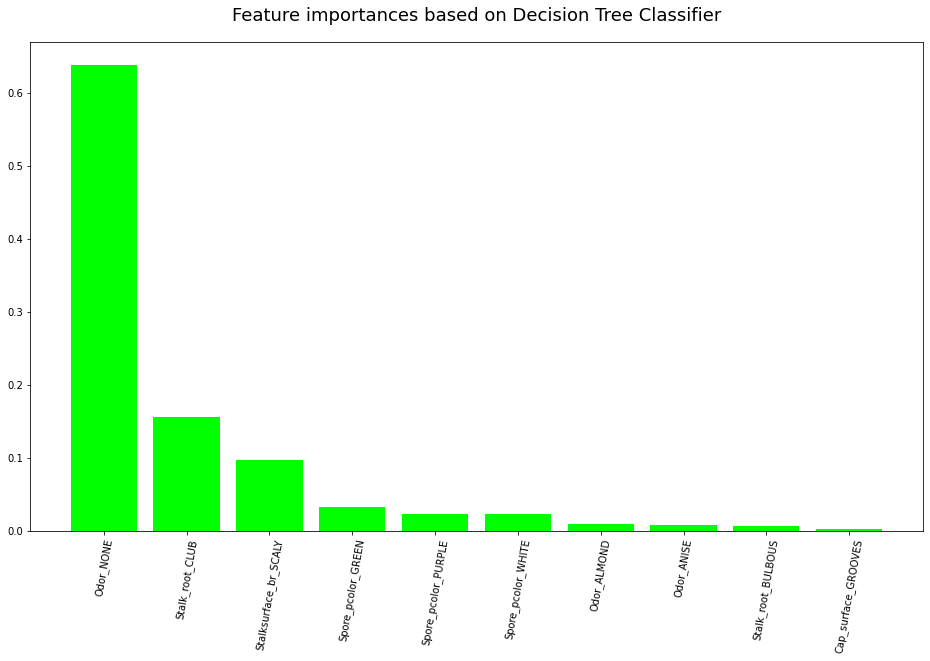

In [45]:
plt.figure(figsize=(16, 9))

from sklearn import ensemble

d_tree2 = DecisionTreeClassifier(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = features_oh.columns

plt.title("Feature importances based on Decision Tree Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()